
# 旅行商问题(Travelling salesman problem, TSP)

TSP是一个典型的优化问题，我们这里尝试使用传说中的蚁群优化算法来解答。

## 简介
一个售货员必须访问n个城市，恰好访问每个城市一次，并最终回到出发城市。售货员从城市i到城市j的旅行费用是一个整数，旅行所需的全部费用是他旅行经过的的各边费用之和，而售货员希望使整个旅行费用最低。
旅行商问题有一点像“最短路径问题”。
对于最短路径问题，我们会自然地想到用Dijkstra算法去求得“从某一个城市出发，到其他所有剩余城市的最短路径”，
或者如果是个真实地图，我们可以用启发式的“A*算法”快速搜索出“从某一个城市到另一个指定城市间的最短路径”。
实际上，它还要求去寻找“从某个城市开始，分别经过其它城市一次且仅一次，最后再回到这个出发城市的最短巡回路径”。
## 问题本质
TSP问题等价于求图的最短Hamilton回路。
令$G=(V,E)$是一个带权重的有向图，顶点集$V=(v_0, v_1, ..., v_{n-1})$。从图中任一顶点$v_i$出发，经图中所有其他顶点一次且只有一次，最后回到同一顶点$v_i$的最短路径。
![](pics/pic29.png)
## 数学模型
记赋权图$G=(V,E)$，$V$为顶点集，$E$为边集，各顶点间的距离$d_{ij}$已知，设
$$
x_{ij}=
\begin{cases}
1, &若(i, j)在回路路径上 \\
0, &其他
\end{cases}
$$
则经典TSP问题可写为如下数学规划模型
$$
min\quad Z=\sum_{i=1}^{n} \sum_{j=1}^{n} d_{ij}x_{ij} \\
s.t. \begin{cases}
\sum_{j=1}^nx_{ij}=1, &i \in V \\
\sum_{i=1}^nx_{ij}=1, &j \in V \\
\sum_{i\in S}\sum_{j\in S}x_{ij} \le |S| - 1, &\forall S\subset V, 2\le |S| \le n-1 \\
x_{ij} \in \{0,1\}
\end{cases}
$$
模型中，n为图中的顶点数，前两个约束表示对每个点仅有一条边进和一条边出，第三个约束保证没有任何子回路解的产生。

满足前三个约束的解构成了一条Hamilton回路

当$d_{ij}=d_{ji} \quad (i,j\in V)$时称为**对称型TSP**，否则为**非对称型TSP**

 # 解法
 ## 穷举法
 遍历每种排列，计算每种排列的代价。

 假设有$N$个城市，那么总共有$N!$个排列，需要写$N-1$层循环，算法时间复杂度$O(N!)$。

In [2]:
# 穷举法
import matplotlib.pyplot as plt
import numpy as np
from scipy import spatial
import math
import time

# 产生一个图，返回没一点的坐标和距离矩阵


def generateMap(num_points):
    # 生成距离矩阵
    points_coordinate = np.random.rand(num_points, 2)
    distance_matrix = spatial.distance.cdist(
        points_coordinate, points_coordinate, metric='euclidean')
    return points_coordinate, distance_matrix

c:\Users\zheng\anaconda3\envs\experiment\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\zheng\anaconda3\envs\experiment\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\zheng\anaconda3\envs\experiment\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [19]:
# 穷举法生成路径


def nextRoute(route):
    for i in range(len(route)):
        if np.all(route[:-(i+2):-1] == np.sort(route[:-(i+2):-1])):
            continue
        swap1 = route[-(i+1)]
        swap = np.sort(route[-i:])
        for j in range(len(swap)):
            if swap[j] > swap1:
                route[-(i+1)] = swap[j]
                swap[j] = swap1
                route[-i:] = np.sort(swap)
                return route

    return route



In [21]:
# test of the next route method
test = np.array([1, 2, 4, 5, 16,6])
test2 = np.array([2, 2, 3, 4])
x = 0
while not np.all(test2 == test):
    x += 1
    test2 = test.copy()
    test = nextRoute(test)
math.factorial(len(test))


<ipython-input-21-8cd2f09ba22d>:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  while not np.all(test2 == test):


720

In [22]:


def evaluate(route, distMat):
    start = 0
    dist = 0
    # 从0开始计算距离，注意送进来的路线试从1开始的，实际的点是从0开始
    # 因为是个loop，所以计算的时候第一个点无所谓
    for i in range(len(route)):
        nextCity = route[i]
        dist += distMat[start, nextCity]
        start = nextCity
    # last leg go back
    dist += distMat[start, 0]
    return dist



In [32]:
num_city = 11
city_coordinates, distance_matrix = generateMap(num_city)

time: 127.98036408424377
访问顺序： 0->9->6->2->10->8->5->1->7->4->3->0
最短距离： 2.750922545311458


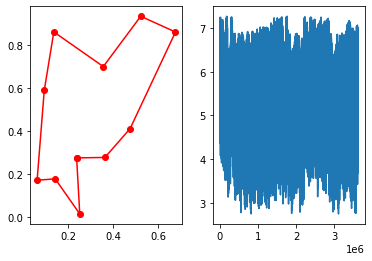

In [34]:
# 从第一个点开始遍历路线，因为试loop
route = [i for i in range(1, num_city)]
bestRoute = []
dists = []
# 起始的路线
bestDist = np.inf
route2 = []
# 遍历所有的排列
startTime = time.time()
while not np.all(route2 == route):
    # 计算距离
    dist = evaluate(route, distance_matrix)
    dists.append(dist)
    if dist < bestDist:
        bestDist = dist
        bestRoute = route.copy()
    route2 = route.copy()
    route = nextRoute(route)

endTime = time.time()
print("time: "+str(endTime - startTime))
# 插入起点和重点好画图
bestRoute = np.insert(bestRoute, 0, 0)
bestRoute = np.append(bestRoute, 0)
fig, ax = plt.subplots(1, 2)
ax[0].plot(city_coordinates[bestRoute, 0],
           city_coordinates[bestRoute, 1], 'o-r')
ax[1].plot(dists)

print('访问顺序：', '->'.join([str(p) for p in bestRoute]))
print('最短距离：', bestDist)


 # 蚁群算法(Ant Colony Optimization, ACO)
 + 蚁群算法是一种用来寻找优化路径的概率型算法

 + 由Marco Dorigo于1992年在他的博士论文中提出，其灵感来源于蚂蚁在寻找食物过程中发现路径的行为

 + 这种算法具有分布计算、信息正反馈和启发式搜索的特征，本质上是进化算法中的一种启发式全局优化算法


 # 蚁群算法
 ## 基本思想
 + 蚂蚁在寻找食物时会在其走过的路径上释放一种分泌物——信息素，使得一定范围内的其他蚂蚁能够察觉并由此影响之后的行为

 + 当一些路径上的蚂蚁越来越多时，其留下的信息素也越来越多，使得信息素强度增大（随时间推移则会逐渐减弱）

 + 一条路径上的信息素强度越大，蚂蚁选择该路径的概率也越高，从而更增加了该路径的信息素强度。这种选择过程成为蚂蚁的自催化行为，是一种增强型学习系统

 # 蚁群算法
 ## ACO算法基本思路
 + 初始化蚁群，随即放置在不同的出发点，通过迭代找到最优路径
 + 每次迭代中根据信息素浓度选择路径，若遇到没有走过的路口就随机挑选一条路径，否则优先选择信息素浓度较高的路径

 # 蚁群算法
 ## 关键公式
 以TSP问题为例，设整个蚁群蚂蚁数量为m，城市数量为n，城市i和城市j之间的距离 $d_{ij}(i, j=1, 2, \cdots, n)$，t时刻
 城市i与城市j连接路径上的信息素浓度为 $\tau_{ij}(t)$。

 初始时刻，蚂蚁被放置在不同的城市上，且各城市间连接路径上的信息素浓度相同，设$\tau_{ij}=\tau_0$。

 然后蚂蚁按一定策略选择线路，设$p_{ij}^k(t)$为t时刻蚂蚁k从城市i转移到城市j的概率。

 蚂蚁TSP策略会受到两个方面的影响：
 + 访问某城市i的期望

 + 其他蚂蚁释放的信息素浓度


 因此，定义

 $$
 p_{ij}^k(t) =
 \begin{cases}
 \frac{\left[ \tau_{ij}(t) \right]^\alpha \cdot \left[ \eta_{ij}(t) \right]^\beta}{\sum_{s\in allow_k \left[ \tau_{is}(t) \right]^\alpha \cdot \left[ \eta_{is}(t) \right]^\beta}} \quad &j \in allow_k \\
 0 \quad &j \notin allow_k
 \end{cases}
 $$

 其中，$\eta_{ij}(t)$为启发函数，表示蚂蚁从城市i转移到城市j的期望；$allow_k(k=1, 2, \cdots, m)$表示蚂蚁k待访问城市的集合。$\alpha$为信息素因子，
 其值越大表明信息素强度影响越大；$\beta$为启发函数因子，其值越大表明启发函数影响越大。

 ![](pics\pic32.png)

 在蚂蚁释放信息素的同时，各城市间连接路径上的信息素强度也会逐渐消失。为描述这一特征，令$\rho(0<\rho<1)$表示信息素的会发程度。
 这样，当蚂蚁完整走完一遍所有城市之后，各城市间路径上的信息浓度为：
 $$
 \begin{cases}
 \tau_{ij}(t+1) = (1-\rho) \cdot \tau_{ij}(t) + \Delta \tau_{ij}, \quad 0 < \rho < 1 \\
 \Delta \tau_{ij} = \sum_{k=1}^m \Delta \tau_{ij}^k
 \end{cases}
 $$

 式中，$\Delta \tau_{ij}^k$表示第k只蚂蚁在城市i和j之间路径上释放信息素而增加的信息素浓度，$\Delta \tau_{ij}$为所有
 蚂蚁在城市i和j连接路径上释放信息素而增加的信息素浓度。

 一般，$\Delta \tau_{ij}^k$可由ant cycle system模型计算：
 $$
 \Delta \tau_{ij}^k =
 \begin{cases}
 \frac{Q}{L_k}, & 若蚂蚁k从城市i访问城市j \\
 0, & 否则
 \end{cases}
 $$

 $$
 \eta_{ij}(t)=\frac{1}{d_{ij}}
 $$

 其中，Q为信息素常数，表示蚂蚁循环一次释放的信息素总量，$L_k$为第k只蚂蚁经过路径的总长。

 # 蚁群算法
## 简单再说一下
对于TSP问题，一群的整体思路就是，随机在某些节点上放置蚂蚁，这些蚂蚁他会找下一个的节点，这个随机也不完全是随机的，试根据距离远近来随机，
越近的被选择的概率越大，不断地重复这个过程，直到完成一个loop。这显然不是最优的。
这个里面有exploration，就是随机放置蚂蚁，随机选择路线，也有exploration就是近路会比较容易被选择到。随机放置蚂蚁就是一个初值，
如果这个随机的蚂蚁仅仅选择最短的路线，没有随机，就太贪心了，就被卡在了局部最优。

下面再加入一个优化就行信息素。蚂蚁跑完一圈以后，所有的蚂蚁的路径会被评估，走的好的蚂蚁的路线上信息素会更加多，
下次有蚂蚁在来到某一结点的时候，他随即算则道路的时候，信息素多的路径被选择的就更高。

不知道大家理解了其中的EE dellima问题没有。
 ## 关键参数
 ### 蚂蚁数量
 蚂蚁数量m过大会使得被搜索过的路径上信息素量变化趋于平均，正反馈作用减弱导致收敛速度减慢；过小则容易使得未被搜索的路径
 信息素量减小到0，使得程序过早出现停滞现象，解的全局优化性降低

 ### 信息素因子
 信息素因子$\alpha$反映蚂蚁在运动过程中积累的信息量在指导蚁群搜索过程中的重要程度。$\alpha$过大，蚂蚁就有较大可能
 选择走过的路径，搜索的随机性减弱；过小则等同于贪心算法，容易过早陷入局部最优。

 ### 启发函数因子
 启发函数因子$\beta$反映启发式信息的重要程度。$\beta$过大蚂蚁在局部点上选择局部最优的可能性打，虽然收敛速度加快但
 全局最优的随机性减弱，过小则陷入完全的随机搜索

 ### 信息素挥发因子
 信息素挥发因子$\rho$直接关系到算法的全局搜索能力和收敛速度，$1-\beta$反映蚂蚁间相互影响的强弱。过大会导致重复搜索的可能性
 大，过小则使收敛速度降低。研究发现$0.2 \le \rho \le 0.5$时综合求解性能比较好。
 ### 信息素常数
 信息素常数Q越大则信息素收敛速度越快。Q过大容易陷入全局最优，过小则影响收敛速度，一般在\[10, 1000\]综合性能较好
 ![](pics\pic32.png)


 # 小结
 ## 优点
 + 采用正反馈机制，使得搜索过程不断收敛，最终逼近最优解。

 + 每个个体可以通过释放信息素来改变周围的环境，且每个个体能够感知周围环境的实时变化，个体间通过环境进行间接地通讯。

 + 搜索过程采用分布式计算方式，多个个体同时进行并行计算，大大提高了算法的计算能力和运行效率。

 + 启发式的概率搜索方式不容易陷入局部最优，易于寻找到全局最优解。


 ## 缺点
 + 蚁群算法中信息素初值相同，选择下一个节点时倾向于随机选择，初期收敛速度慢

 + 正反馈会使次优解很快占据优势，使算法陷入局部最优，且难以跳出局部最优

 + 参数选择更多是依赖经验和试错，不恰当的初始参数会减弱算法的寻优能力。当进行路径规划时，为避免形成环形路径或者重复访问某些节点在算法中设置禁忌表，但是禁忌表很容易造成“死锁”现象，减少种群中的有效蚂蚁数量，降低算法的优化效率。

time: 0.34905290603637695
访问顺序： 7->1->5->8->10->0->6->2->9->3->4->7
最短距离： 2.762550557747459


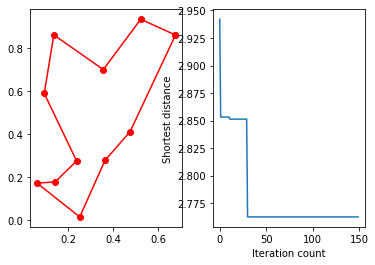

In [33]:

# 城市个数

# 从第一个点开始遍历路线，因为试loop
route = [i for i in range(1, num_city)]
bestRoute = []
dists = []
# 起始的路线
bestDist = np.inf
route2 = []

# 蚂蚁数量
num_ant = 6
# 信息素重要程度因子
alpha = 2
# 启发函数重要程度因子
beta = 5
# 信息素挥发速度
rho = 0.1
# 信息素常数
Q = 1

iter = 0
max_iter = 150

# 启发函数，蚂蚁从城市i转移到j的期望程度
eta_table = 1.0 / (distance_matrix + np.diag([1e10] * num_city))
# 信息素矩阵
tau_table = np.ones((num_city, num_city))
# 路径记录表
path_table = np.zeros((num_ant, num_city)).astype(int)

# 每次iteration平均距离
length_avg = np.zeros(max_iter)
# 每次iteration最短距离
length_best = np.zeros(max_iter)
# 每次iteration最短路径
path_best = np.zeros((max_iter, num_city))

startTime = time.time()
# 每次迭代都让蚂蚁完整遍历一次全部城市
while iter < max_iter:
    # 蚂蚁数量比城市多，部分城市放置多个蚂蚁
    if num_ant < num_city:
        starts = np.random.permutation(range(num_city))[:num_ant]
    else:
        starts = np.random.permutation(range(num_ant)) % num_city
    path_table[:, 0] = starts
    length = np.zeros(num_ant)

    # 遍历每只蚂蚁
    for antNo in range(num_ant):
        # 计算第i只蚂蚁转移到下一城市的概率
        visiting = path_table[antNo, 0]

        # 未访问城市的集合
        unvisited = set(range(num_city))
        unvisited.remove(visiting)

        for j in range(1, num_city):
            # 轮盘赌法选择下一个要访问的城市
            unvisited_list = list(unvisited)
            prob_trans = np.zeros(len(unvisited_list))

            for k in range(len(unvisited_list)):
                # 转移到下一个没有访问过的城市的概率=(到哪个城市的信息素**alpha)*（到那个城市的eta（距离的倒数）**beta）
                prob_trans[k] = np.power(tau_table[visiting][unvisited_list[k]], alpha) \
                    * np.power(eta_table[visiting][unvisited_list[k]], beta)

            # 累积概率，求和=1
            cumsum_prob_trans = (prob_trans / sum(prob_trans)).cumsum()
            # 累计概率剪掉一个随机数，因为是累积概率，所以，过0点落在那个区间的概率，
            # 是由那个区间大小决定的
            cumsum_prob_trans -= np.random.rand()
            # 找到第一个>0的元素，作为下一个访问的点
            k = unvisited_list[list(cumsum_prob_trans > 0).index(True)]

            # 更新路径矩阵
            path_table[antNo, j] = k
            # 更新待访问城市集合
            unvisited.remove(k)
            # 更新当前蚂蚁走过的距离
            length[antNo] += distance_matrix[visiting][k]
            # 更新当前城市
            visiting = k

        # 加上最后一个点到初始点的距离
        length[antNo] += distance_matrix[visiting][path_table[antNo, 0]]

    # 找到本次迭代最好的路径
    if iter == 0:
        # 第一次迭代最好成绩就记录本次迭代最好成绩
        length_best[iter] = length.min()
        path_best[iter] = path_table[length.argmin()].copy()
    else:
        # 本次迭代的最短路径长度大于上一次，也是总体最短路径长度
        if length.min() > length_best[iter - 1]:
            # 那就把上一次的保留位这一次最好成绩
            length_best[iter] = length_best[iter - 1]
            path_best[iter] = path_best[iter - 1].copy()
        else:
            # 这一次比上一次号，则记录下这一词最短路径和最短的路径的长度
            length_best[iter] = length.min()
            path_best[iter] = path_table[length.argmin()].copy()

    # 更新信息素，这个矩阵信息素的增量矩阵,tau
    change_pheromone_table = np.zeros((num_city, num_city))
    for antNo in range(num_ant):
        for j in range(num_city - 1):
            # 根据公式更新第i只蚂蚁改变的城市间的信息素，Q / L, L这个蚂蚁走完整个路线的长度
            # 如果这个路线越短，说民这个贸易找的路更好，就刘家更多的信息种族
            change_pheromone_table[path_table[antNo, j]][path_table[antNo, j + 1]
                                                         ] += Q / length[antNo]
    # 之前的信息素蒸发一部分，再加上现在新的
    tau_table = (1 - rho) * tau_table + change_pheromone_table

    iter += 1


endTime = time.time()
print("time: "+str(endTime - startTime))

best_route = [int(p) for p in path_best[-1]] + [int(path_best[-1][0])]
best_coordinate = city_coordinates[best_route, :]

print('访问顺序：', '->'.join([str(p) for p in best_route]))
print('最短距离：', length_best[-1])
fig, ax = plt.subplots(1, 2)
ax[0].plot(best_coordinate[:, 0], best_coordinate[:, 1], 'o-r')
ax[1].plot(length_best)
ax[1].set_xlabel('Iteration count')
ax[1].set_ylabel('Shortest distance')
plt.show()
